In [1]:
# Thierry Nkombo
# NVIDIA Stock Price Prediction Project
# Dataset (via Kaggle): https://www.kaggle.com/datasets/muhammaddawood42/nvidia-stock-data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

df = pd.read_csv("NVIDIA_STOCK.csv")

print("\nFeatures Names:")
print(df.columns)

print("\nKey Statistics:")
print(df.describe())

print("\n")
print(df.isnull().sum())
print("\n")

df["SMA_50"] = df["Adj Close"].rolling(window=50).mean()
df["SMA_200"] = df["Adj Close"].rolling(window=200).mean()


Features Names:
Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Key Statistics:
         Adj Close        Close         High          Low         Open  \
count  1697.000000  1697.000000  1697.000000  1697.000000  1697.000000   
mean     24.797593    24.828411    25.295239    24.315422    24.823341   
std      29.221442    29.216014    29.811740    28.570804    29.240504   
min       3.151430     3.177000     3.249500     3.111500     3.162250   
25%       6.113620     6.161750     6.250000     6.064250     6.166250   
50%      13.985092    14.015750    14.243500    13.750000    14.033750   
75%      27.088902    27.104000    27.496000    26.613001    27.077999   
max     135.559067   135.580002   140.759995   132.419998   139.800003   

             Volume  
count  1.697000e+03  
mean   4.716865e+08  
std    2.093254e+08  
min    9.788400e+07  
25%    3.278440e+08  
50%    4.349650e+08  
75%    5.708320e+08  
max    2.511528e+09  


Date        

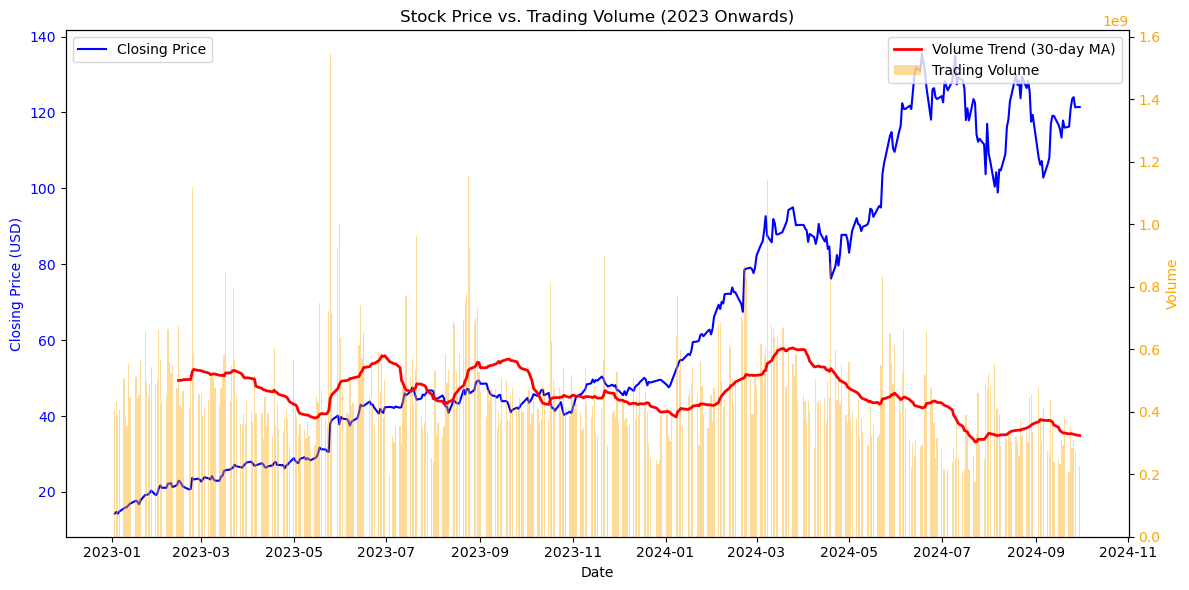

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Format Date
df["Date"] = pd.to_datetime(df["Date"])
df_plot = df.copy()

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["DayOfMonth"] = df["Date"].dt.day
df["IsMonthStart"] = df["Date"].dt.is_month_start.astype(int)
df["IsMonthEnd"] = df["Date"].dt.is_month_end.astype(int)

df.drop(columns=["Date"], inplace=True)

# Filter Data for 2023+
df_2023 = df_plot[df_plot["Date"] >= "2023-01-01"].copy()

# Compute 30-day Moving Average for Volume 
df_2023["Volume_Trend"] = df_2023["Volume"].rolling(window=30).mean()
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Closing Price
ax1.set_xlabel("Date")
ax1.set_ylabel("Closing Price (USD)", color="blue")
ax1.plot(df_2023["Date"], df_2023["Close"], color="blue", label="Closing Price")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot Volume
ax2 = ax1.twinx()
ax2.set_ylabel("Volume", color="orange")
ax2.bar(df_2023["Date"], df_2023["Volume"], color="orange", alpha=0.4, label="Trading Volume")
ax2.tick_params(axis="y", labelcolor="orange")

# Volume Trend Line
ax2.plot(df_2023["Date"], df_2023["Volume_Trend"], color="red", linewidth=2, label="Volume Trend (30-day MA)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("Stock Price vs. Trading Volume (2023 Onwards)")
fig.tight_layout()
plt.show()


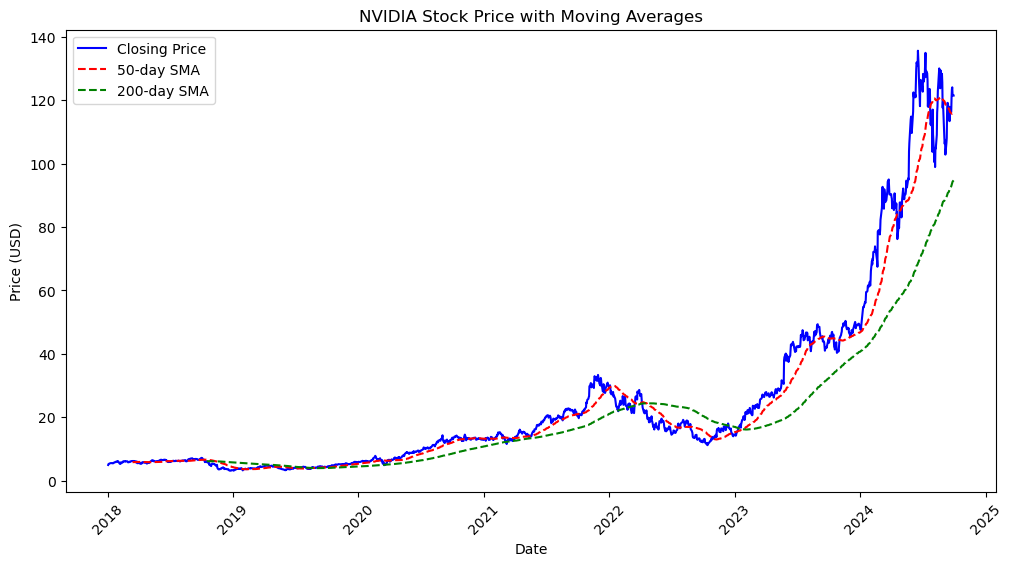

In [5]:
# Compute Moving Averages
df_plot["SMA_50"] = df_plot["Close"].rolling(window=50).mean()
df_plot["SMA_200"] = df_plot["Close"].rolling(window=200).mean()

# Closing Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df_plot["Date"], df_plot["Close"], label="Closing Price", color="blue")
plt.plot(df_plot["Date"], df_plot["SMA_50"], label="50-day SMA", color="red", linestyle="dashed")
plt.plot(df_plot["Date"], df_plot["SMA_200"], label="200-day SMA", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("NVIDIA Stock Price with Moving Averages")
plt.legend()
plt.xticks(rotation=45)
plt.show()


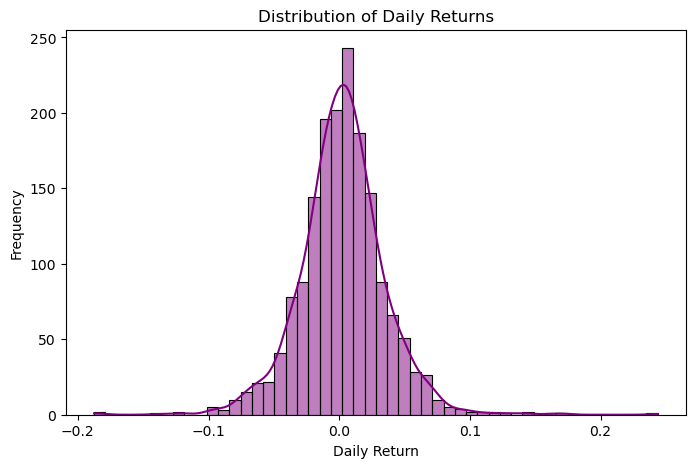

In [7]:
df_plot["Daily Returns"] = df_plot["Close"].pct_change()

# Compute Daily Returns
df_plot["Daily Returns"] = df_plot["Close"].pct_change()

# Plot Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_plot["Daily Returns"].dropna(), bins=50, kde=True, color="purple")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define Features and Target
X = df.drop(columns=['High', 'Low', 'Open', 'Close', 'Adj Close'])
y = df['Adj Close']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on Test Set
y_pred = rf_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Squared Error: {mse:.4f}")
print(f"Random Forest - R-squared: {r2:.4f}")


Random Forest - Mean Squared Error: 2.3385
Random Forest - R-squared: 0.9973


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Feature importance
feature_importance = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

df["Month_Volume"] = df["Month"] * df["Volume"]  # Interaction term
df["DayOfWeek_Volume"] = df["DayOfWeek"] * df["Volume"]
df["EMA_50"] = df["Close"].ewm(span=50, adjust=False).mean()  
df["EMA_200"] = df["Close"].ewm(span=200, adjust=False).mean()

        Feature  Importance
1        SMA_50    0.760988
2       SMA_200    0.235294
6    DayOfMonth    0.001330
0        Volume    0.001247
4         Month    0.000867
5     DayOfWeek    0.000176
3          Year    0.000080
7  IsMonthStart    0.000010
8    IsMonthEnd    0.000008


In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate future dates (end of each month from Oct 2024 to Mar 2025)
future_dates = pd.date_range(start="2025-1-31", periods=3, freq="ME")

# DataFrame for storing predictions
future_df = pd.DataFrame({
    "Year": future_dates.year,
    "Month": future_dates.month,
    "DayOfMonth": future_dates.day,
    "DayOfWeek": future_dates.dayofweek,
    "IsMonthStart": [1 if date.is_month_start else 0 for date in future_dates],
    "IsMonthEnd": [1 if date.is_month_end else 0 for date in future_dates],
})

# Sort original dataset by date
df = df.sort_values(by=["Year", "Month", "DayOfMonth"])

# Get last available row from the dataset
last_row = df.iloc[-1].copy()

# Fill in numerical features dynamically for each future date
future_df["Volume"] = last_row["Volume"]  # Use last given volume
future_df["SMA_50"] = df["Close"].rolling(window=50).mean().dropna().iloc[-1]  
future_df["SMA_200"] = df["Close"].rolling(window=200).mean().dropna().iloc[-1]
future_df["EMA_50"] = df["Close"].ewm(span=50, adjust=False).mean().iloc[-1]  
future_df["EMA_200"] = df["Close"].ewm(span=200, adjust=False).mean().iloc[-1]
future_df["Volume_Trend"] = df["Volume"].rolling(window=30).mean().dropna().iloc[-1]
future_df["Daily Returns"] = df["Close"].pct_change().dropna().iloc[-1]

# Compute aggregated volume trends
future_df["Month_Volume"] = df.groupby("Month")["Volume"].transform("mean").iloc[-1]
future_df["DayOfWeek_Volume"] = df.groupby("DayOfWeek")["Volume"].transform("mean").iloc[-1]

# Ensuring feature order matches training data
future_df = future_df[X_train.columns]

# Make predictions
future_predictions = rf_model.predict(future_df)

# Add predictions to the DataFrame
future_df["Predicted Adj Close"] = future_predictions

# Display results
print(future_df[["Year", "Month", "Predicted Adj Close"]])


   Year  Month  Predicted Adj Close
0  2025      1           120.759497
1  2025      2           121.288001
2  2025      3           120.683607


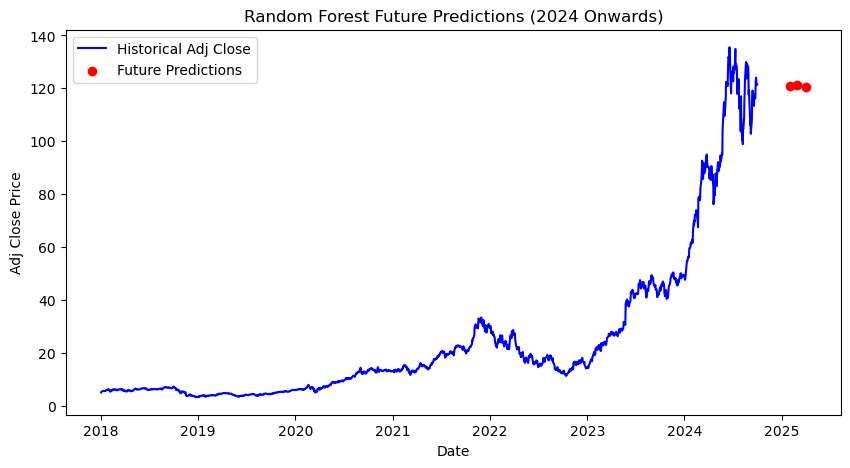

In [19]:
import matplotlib.pyplot as plt

# Ensuring "Date" exists in future_df
future_df["Date"] = future_dates  # Explicitly assign generated future dates
future_df["Date"] = pd.to_datetime(future_df["Date"])  # Convert to datetime

# Ensuring "Date" exists in df before plotting
if "Date" not in df.columns:
    df["Date"] = df_plot["Date"]  # Restore from original copy

df["Date"] = pd.to_datetime(df["Date"])  # Datetime format

# Historical vs Future Predictions
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Adj Close"], label="Historical Adj Close", color="blue")
plt.scatter(future_df["Date"], future_df["Predicted Adj Close"], color="red", label="Future Predictions")
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.title("Random Forest Future Predictions (2024 Onwards)")
plt.legend()
plt.show()
